<a href="https://colab.research.google.com/github/AlameluPriya-arunagiri1421/CODSOFT/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MOVIE GENRE CLASSIFICATION

Import Libraries

In [28]:
!pip install -q scikit-learn nltk seaborn
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Upload ZIP file

In [17]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


Extract the ZIP

In [29]:
import zipfile
import os

zip_path = "archive.zip"
extract_dir = "movie_genre_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

os.listdir(os.path.join(extract_dir, 'Genre Classification Dataset'))


['train_data.txt',
 'test_data_solution.txt',
 'test_data.txt',
 'description.txt']

Load Train Data

In [30]:
def load_dataset(path):
    data = []
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(" ::: ")
            if len(parts) == 4:
                data.append({
                    "id": parts[0],
                    "title": parts[1],
                    "genre": parts[2],
                    "description": parts[3]
                })
    return pd.DataFrame(data)

train_path = "/content/movie_genre_data/Genre Classification Dataset/train_data.txt"
df = load_dataset(train_path)

df = df.head(1000)

df.head()


,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


Filter Rare Genres & Train-Test Split

In [32]:
genre_counts = df['genre'].value_counts()
valid_genres = genre_counts[genre_counts >= 2].index
df = df[df['genre'].isin(valid_genres)].reset_index(drop=True)

X = df['description']
y = df['genre']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


/tmp/ipython-input-33-3175008500.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


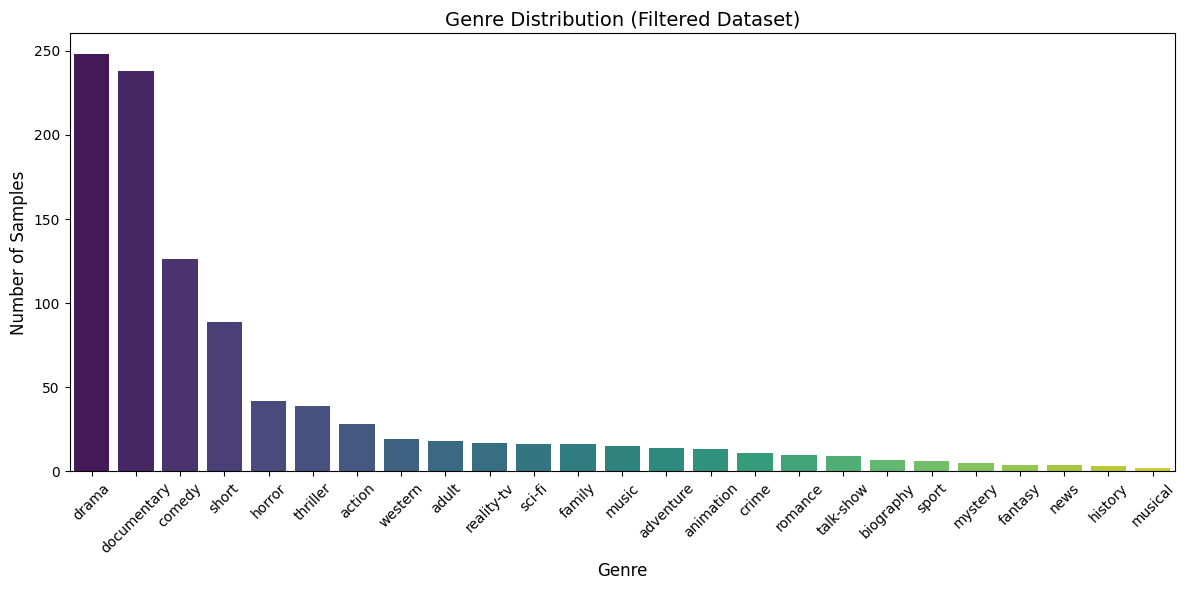

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

genre_counts = df['genre'].value_counts()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Genre Distribution (Filtered Dataset)", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TF-IDF Vectorization

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)


Train the Model

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

Evaluate the Model

Accuracy: 0.46

 Classification Report:
               precision    recall  f1-score   support

      action       0.00      0.00      0.00         6
       adult       0.00      0.00      0.00         4
   adventure       0.00      0.00      0.00         3
   animation       0.00      0.00      0.00         3
   biography       0.00      0.00      0.00         1
      comedy       0.46      0.24      0.32        25
       crime       0.00      0.00      0.00         2
 documentary       0.53      0.88      0.66        48
       drama       0.41      0.86      0.55        50
      family       0.00      0.00      0.00         3
     fantasy       0.00      0.00      0.00         1
      horror       0.00      0.00      0.00         8
       music       0.00      0.00      0.00         3
     mystery       0.00      0.00      0.00         1
        news       0.00      0.00      0.00         1
  reality-tv       0.00      0.00      0.00         3
     romance       0.00      0.00      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


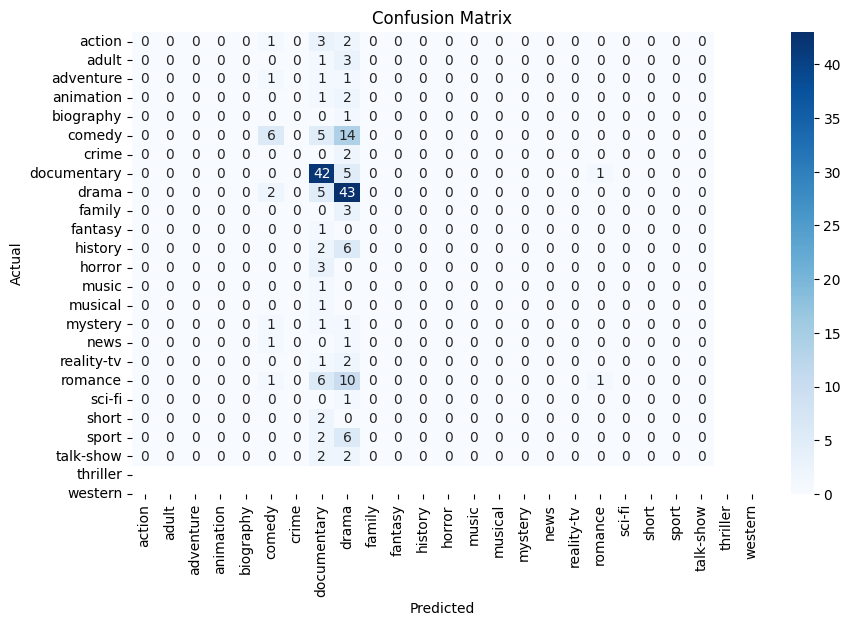

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_val_tfidf)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\n Classification Report:\n", classification_report(y_val, y_pred))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d',
            xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Load and Predict on Test Data

In [27]:
def load_test_data(path):
    data = []
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(" ::: ")
            if len(parts) == 3:
                data.append({
                    "id": parts[0],
                    "title": parts[1],
                    "description": parts[2]
                })
    return pd.DataFrame(data)

# Load test data
test_path = "/content/movie_genre_data/Genre Classification Dataset/test_data.txt"
test_df = load_test_data(test_path)

# Transform and predict
test_tfidf = vectorizer.transform(test_df['description'])
test_df['predicted_genre'] = model.predict(test_tfidf)

# Show a few predictions
test_df[['title', 'predicted_genre']].head()


,title,predicted_genre
0,Edgar's Lunch (1998),drama
1,La guerra de papá (1977),drama
2,Off the Beaten Track (2010),documentary
3,Meu Amigo Hindu (2015),drama
4,Er nu zhai (1955),drama
